<a href="https://colab.research.google.com/github/niroshank/data-mining-models/blob/master/Section_C_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import required libries and import dataset
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
# Create a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
# Add target column to the dataframe
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# Create two dataframe to features and targets by dividing the main dataframe
inputs = df.drop(['target'], axis='columns')
targets = df.target
inputs.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
targets.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [0]:
# Divide dataset into train and test, 80% for traniing and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.33)
print("Number of training features", len(X_train))
print("Number of training targets", len(y_train))
print("Number of testing features", len(X_test))
print("Number of testing targets", len(y_test))

Number of training features 100
Number of training targets 100
Number of testing features 50
Number of testing targets 50


**Create the model**

In [0]:
# Create the mutinomial logistic regression model
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Test the model**

In [0]:
# Get the score of model
model.score(X_test,y_test)

0.96

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'Truth')

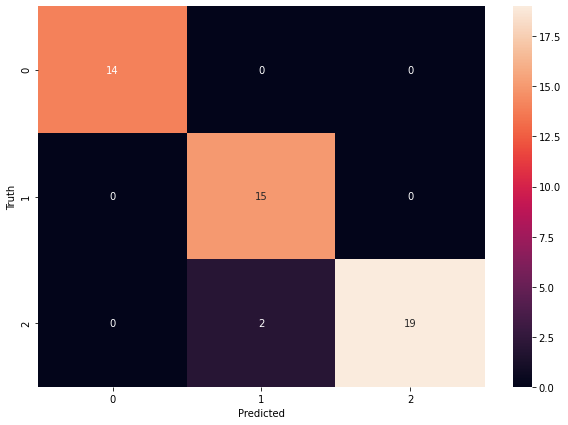

In [0]:
# Ploting a confusion matrix
import seaborn as sn # to create a heatmap
from sklearn.metrics import confusion_matrix
y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [0]:
# Finding accuracy of Multivarite  from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0
for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('Accuracy of the multiclass logistic classification is: ', corrPred/(cm.sum()))

Correct predictions:  48
False predictions 2
Accuracy of the multiclass logistic classification is:  0.96
